# Where Should Microsoft Put Investment in New Film Projects?

## As a fledging studio 'Microsoft Pictures' must ensure profitability by investing in projects that:

###    - Center around highly rated, viewed, and desired genres and story arcs
###    - Attach names of directors and actors that create buzz and viewers
###    - 

In [1]:
# import the packages that will be used in this project

import pandas as pd
import requests as rq
from matplotlib import pyplot as plt
import seaborn as sns

# Top-Rated Genres

In [2]:
# read in the data from IMDB

# Two datafiles will be used here: (1) imdb.title.basics.csv.gz, and (2) imdb.title.ratings.csv.gz
imdb_title_basics_df = pd.read_csv('data/zippedData/imdb.title.basics.csv.gz')
imdb_title_ratings_df = pd.read_csv('data/zippedData/imdb.title.ratings.csv.gz')


In [3]:
# Merge the datafiles based on primary key 'tconst'
imdb_complete_df = imdb_title_ratings_df.merge(imdb_title_basics_df, on='tconst')

# Preview the resulting datafile
imdb_complete_df.head()


,tconst,averagerating,numvotes,primary_title,original_title,start_year,runtime_minutes,genres
0,tt10356526,8.3,31,Laiye Je Yaarian,Laiye Je Yaarian,2019,117.0,Romance
1,tt10384606,8.9,559,Borderless,Borderless,2019,87.0,Documentary
2,tt1042974,6.4,20,Just Inès,Just Inès,2010,90.0,Drama
3,tt1043726,4.2,50352,The Legend of Hercules,The Legend of Hercules,2014,99.0,"Action,Adventure,Fantasy"
4,tt1060240,6.5,21,Até Onde?,Até Onde?,2011,73.0,"Mystery,Thriller"


In [4]:
# get info on the datafile
imdb_complete_df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 73856 entries, 0 to 73855
Data columns (total 8 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   tconst           73856 non-null  object 
 1   averagerating    73856 non-null  float64
 2   numvotes         73856 non-null  int64  
 3   primary_title    73856 non-null  object 
 4   original_title   73856 non-null  object 
 5   start_year       73856 non-null  int64  
 6   runtime_minutes  66236 non-null  float64
 7   genres           73052 non-null  object 
dtypes: float64(2), int64(2), object(4)
memory usage: 5.1+ MB


#### We see that our focus, 'genres', has missing values, so we will drop these rows
###### (NOTE: There are also missing values in 'runtime_minutes' but we are not concerned with this column)

In [5]:
# Drop null values from the 'genres' column
imdb_complete_df.dropna(subset=['genres'], axis=0, inplace=True)

# Check .info() again
imdb_complete_df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 73052 entries, 0 to 73855
Data columns (total 8 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   tconst           73052 non-null  object 
 1   averagerating    73052 non-null  float64
 2   numvotes         73052 non-null  int64  
 3   primary_title    73052 non-null  object 
 4   original_title   73052 non-null  object 
 5   start_year       73052 non-null  int64  
 6   runtime_minutes  65720 non-null  float64
 7   genres           73052 non-null  object 
dtypes: float64(2), int64(2), object(4)
memory usage: 5.0+ MB


#### We see the null values have been dropped

### Next, we begin manipulating the data for presentation and visualization

In [6]:
# First we filter out low ratings so we can focus in on higher rated genres. We filter out ratings lower than 8.5
imdb_low_ratings = imdb_complete_df[imdb_complete_df['averagerating'] < 8.5].index
imdb_complete_df.drop(imdb_low_ratings, inplace=True)

# Check the data to see lower ratings were dropped
imdb_complete_df['averagerating'].min()

8.5

In [7]:
# Then we filter out titles that have received fewer than 300 votes for rating
imdb_low_votes = imdb_complete_df[imdb_complete_df['numvotes'] < 300.0].index
imdb_complete_df.drop(imdb_low_votes, inplace=True)

# Check the data to see lower voted titles were dropped
imdb_complete_df['numvotes'].min()

302

In [8]:
# Preview the dataframe and get a feel for our column names
imdb_complete_df.head(1)

,tconst,averagerating,numvotes,primary_title,original_title,start_year,runtime_minutes,genres
1,tt10384606,8.9,559,Borderless,Borderless,2019,87.0,Documentary


In [9]:
# Change the dataframe to only contain the info we are interested in. 
# For our purpose we are interested in 3 columns; 'genres' is our focus, and then 'averagerating' and 'numvotes', so we drop all other columns
imdb_genre_ratings = imdb_complete_df.drop(['tconst', 'primary_title','original_title','start_year','runtime_minutes'], axis=1)

# We then preview the resulting dataframe
imdb_genre_ratings.head()

,averagerating,numvotes,genres
1,8.9,559,Documentary
595,8.5,43409,"Crime,Thriller"
689,8.6,558,Drama
745,8.9,2111,Documentary
1732,8.6,367,Animation


#### We can see that some of the values in the 'genre' column contain multiple genre values separated by commas.
#### We will drop these rows which will allow us to focus on specific genres with high ratings and number of votes

In [10]:
# We check the data type of the values in the 'genre' column
# We see that the values are 'O' type, which equate to strings in pandas
imdb_genre_ratings['genres'].dtype

dtype('O')

In [11]:
# Being strings, we can filter out rows with multiple genre values on the condition of having a comma within the string
imdb_genre_ratings_with_comma = imdb_genre_ratings[imdb_genre_ratings['genres'].str.contains(',')].index
imdb_genre_ratings.drop(imdb_genre_ratings_with_comma, inplace=True)

# Then check our dataframe again to see they have been dropped
imdb_genre_ratings.head()

,averagerating,numvotes,genres
1,8.9,559,Documentary
689,8.6,558,Drama
745,8.9,2111,Documentary
1732,8.6,367,Animation
1908,8.7,674,Drama


In [12]:
# Lets clean up our table to be more pleasing to the reader
# We will change our column names and drop the 'numvotes' column since we don't need it anymore

# Change column names
imdb_genre_ratings = imdb_genre_ratings.rename({'genres':'Genre','averagerating':'Rating'}, axis=1)

# Drop the 'numvotes' column
imdb_genre_ratings = imdb_genre_ratings.drop('numvotes', axis=1)

# And check our table
imdb_genre_ratings.head()

,Rating,Genre
1,8.9,Documentary
689,8.6,Drama
745,8.9,Documentary
1732,8.6,Animation
1908,8.7,Drama


In [13]:
# then we group our dataframe by 'Genres' to show the mean of average ratings for each genre
imdb_ratings_means = imdb_genre_ratings.groupby('Genre').mean().sort_values(by='Rating', ascending=False)

# and preview the dataframe again
imdb_ratings_means

,Rating
Genre,
Action,9.200000
Thriller,9.000000
Documentary,8.989655
Comedy,8.966667
Drama,8.934211
Animation,8.900000
Family,8.733333
Adventure,8.700000
Musical,8.625000


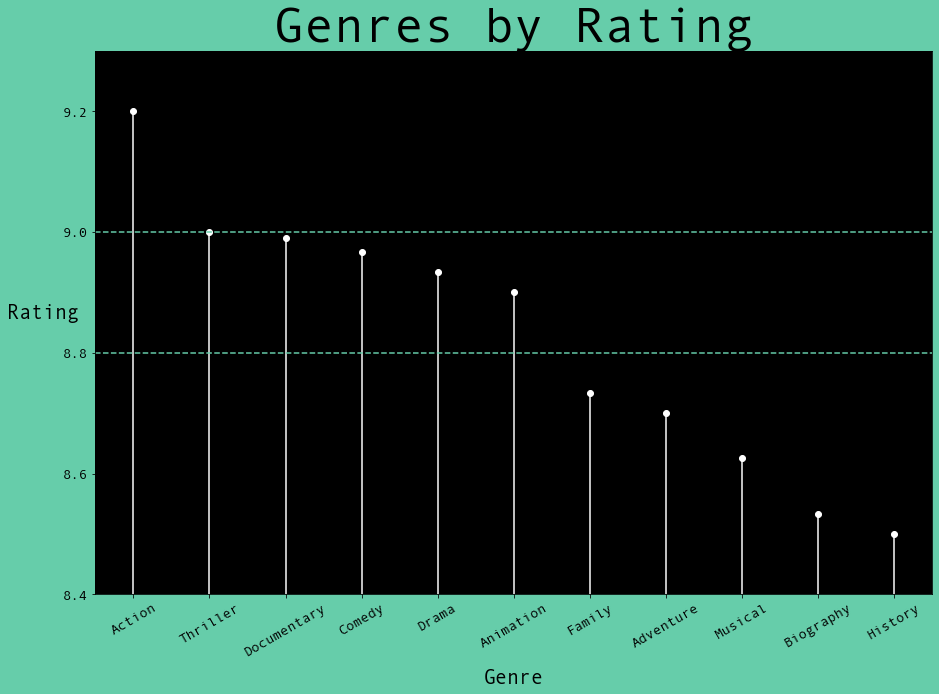

In [19]:
# Lets plot the table to better visualize the data

fig, ax = plt.subplots()
fig.set_size_inches(15, 10)
fig.set_facecolor('mediumaquamarine')
ax.set_facecolor('black')
ax.stem(imdb_ratings_means.index, imdb_ratings_means['Rating'], linefmt='w-', markerfmt='wo', basefmt='w')
ax.set(ylim=(8.4, 9.3),)
ax.set_xlabel('Genre', font='Andale Mono', fontsize=20, labelpad=10)
ax.set_ylabel('Rating', rotation=0, font='Andale Mono', fontsize=20, labelpad=20)
ax.set_title('Genres by Rating', font='Andale Mono', fontsize=50, loc="center", pad=10)
plt.xticks(font='Andale Mono', fontsize=14)
plt.yticks(font='Andale Mono', fontsize=14)
plt.axhline(y=9.0, ls='--', c='mediumaquamarine')
plt.axhline(y=8.8, ls='--', c='mediumaquamarine')
ax.tick_params(axis='x', labelrotation = 30)
plt.savefig('./images/genres_by_rating.png')

# Look at ways to reduce budget and maximize box office gross

# Attach buzzworthy and high grossing talent